<a href="https://colab.research.google.com/github/Ketsungnoen/Image-Shoe/blob/main/test_13march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!nvidia-smi

Fri Jan 19 16:45:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [10]:
from fastbook import *

In [11]:
np.random.seed(5555)

In [12]:
pwd

'/content'

In [13]:
# path =  ("C:\\Users\\Oranuch\\Documents\\Python project\\shoe")
path = ("/content/gdrive/MyDrive/Shoeprint")
path

'/content/gdrive/MyDrive/Shoeprint'

In [14]:
fnames = get_image_files(path)
fnames

(#26) [Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_3.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_1.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_2.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_10.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_7.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_6.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_5.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_4.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_9.jpg'),Path('/content/gdrive/MyDrive/Shoeprint/Nike/N_8.jpg')...]

In [15]:
pat = r"([^/]+)_\d+.*$"
re.findall(pat, str(fnames[0]))

['N']

In [16]:
item_tfms = RandomResizedCrop(460, min_scale=0.8, ratio=(1., 1.))

In [17]:
batch_tfms = [*aug_transforms(size=224, max_warp=0.15), Normalize.from_stats(*imagenet_stats)]

In [ ]:
# aug_transforms??
# RandomResizedCrop??

In [18]:
bs = 16

In [19]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, bs=bs,
                                     batch_tfms=batch_tfms, item_tfms=item_tfms)

In [20]:
# ImageDataLoaders.from_name_re??

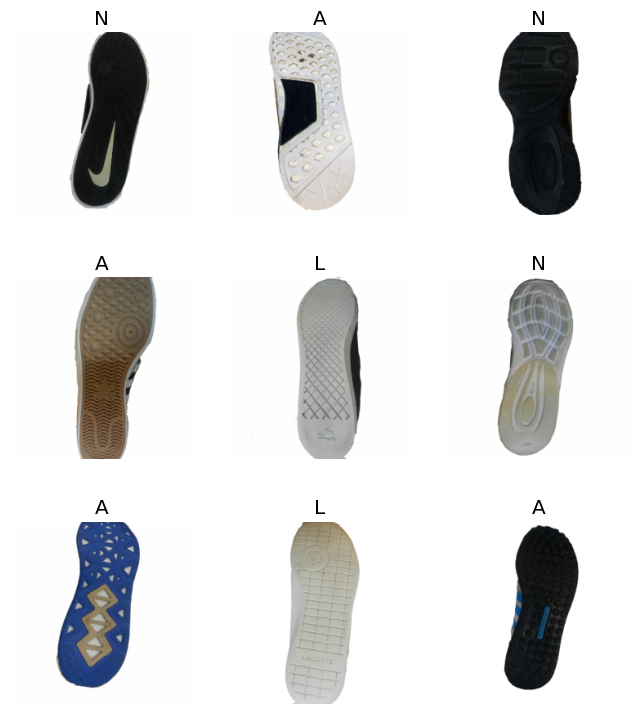

In [21]:
dls.show_batch(max_n=9, figsize=(8, 9))

In [22]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat=r"/([^/]+)_\d+.*"),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [23]:
splitter = RandomSplitter(valid_pct=0.2, seed=5555)
splitter(fnames)

((#21) [17,9,6,20,15,12,8,11,5,13...], (#5) [18,14,7,24,16])

In [24]:
# path_im = "C:\\Users\\Oranuch\\Documents\\Python project\\shoe"
path_im = path

In [25]:
dls = pets.dataloaders(path_im, bs=bs)

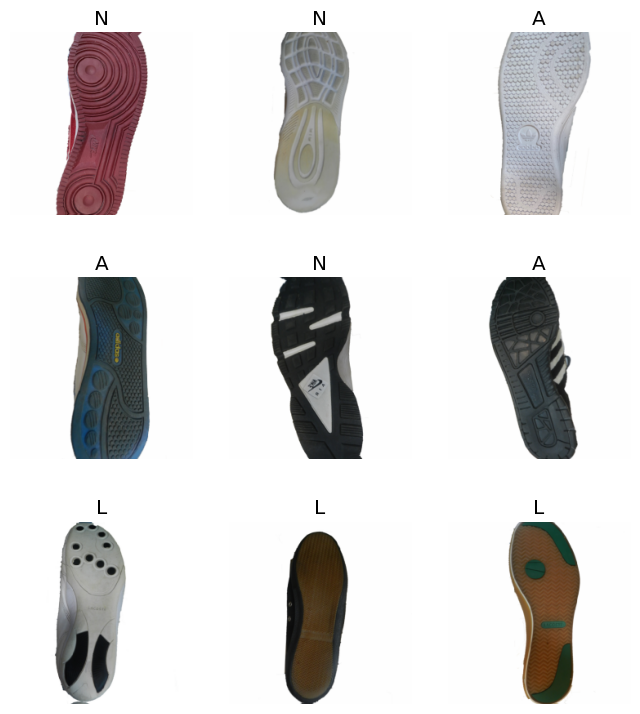

In [26]:
dls.show_batch(max_n=9, figsize=(8, 9))

In [27]:
dls.vocab[2]

'N'

In [28]:
dls.vocab

['A', 'L', 'N']

In [29]:
dls.vocab.o2i.get("Le")

In [30]:
dls.vocab.o2i

{'A': 0, 'L': 1, 'N': 2}

In [31]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 104MB/s]


In [32]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate,time
0,1.935660,1.500531,0.400000,00:08
1,1.429970,1.538276,0.400000,00:05
2,1.420901,1.457195,0.400000,00:05
3,1.523041,1.118441,0.400000,00:07
4,1.637843,1.099804,0.400000,00:05
5,1.598590,1.036124,0.400000,00:06
6,1.462877,0.978138,0.200000,00:05
7,1.347207,0.863077,0.200000,00:05
8,1.275778,0.776715,0.200000,00:06
9,1.209170,0.712845,0.200000,00:05


In [33]:
learn.save("01i-stage1")

Path('models/01i-stage1.pth')

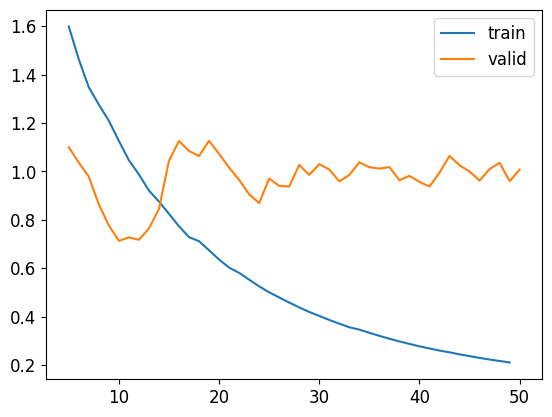

In [34]:
learn.recorder.plot_loss()

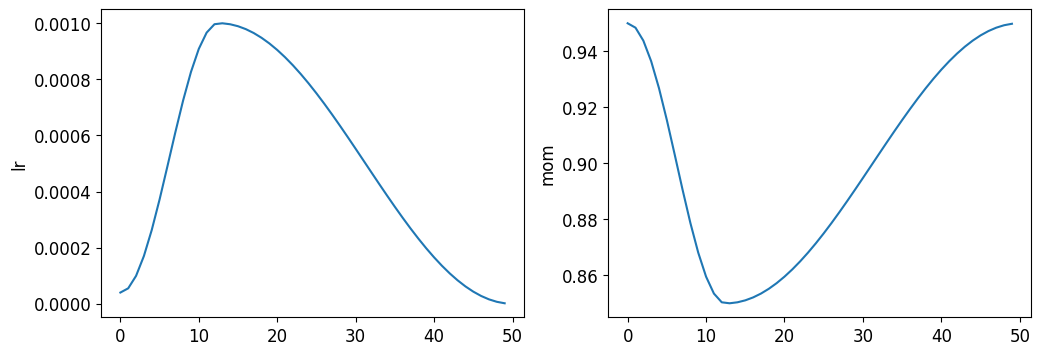

In [36]:
 learn.recorder.plot_sched()

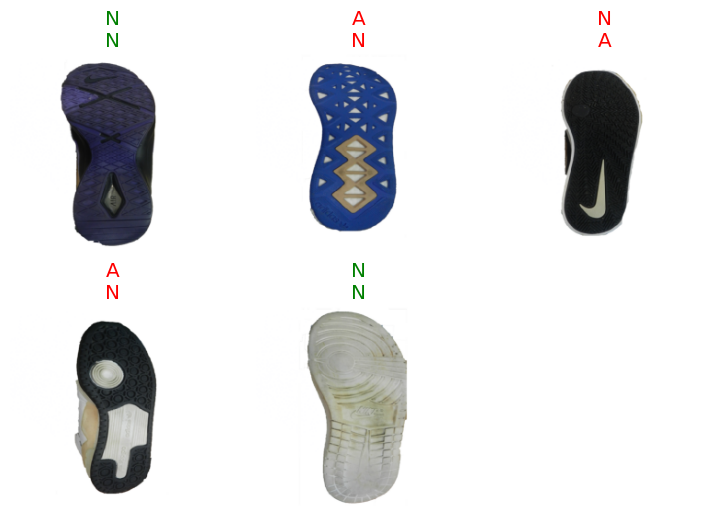

In [37]:
learn.show_results()

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

len(dls.valid_ds) == len(losses) == len(idxs)

True

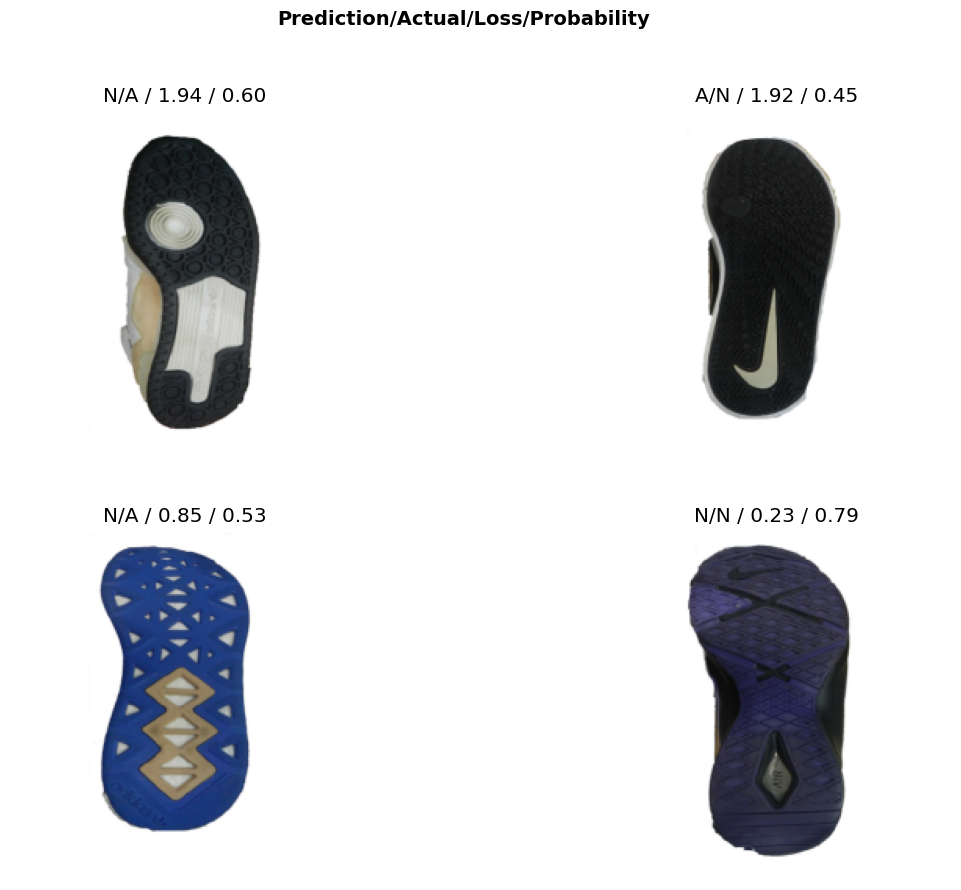

In [39]:
interp.plot_top_losses(4, figsize=(14, 10))

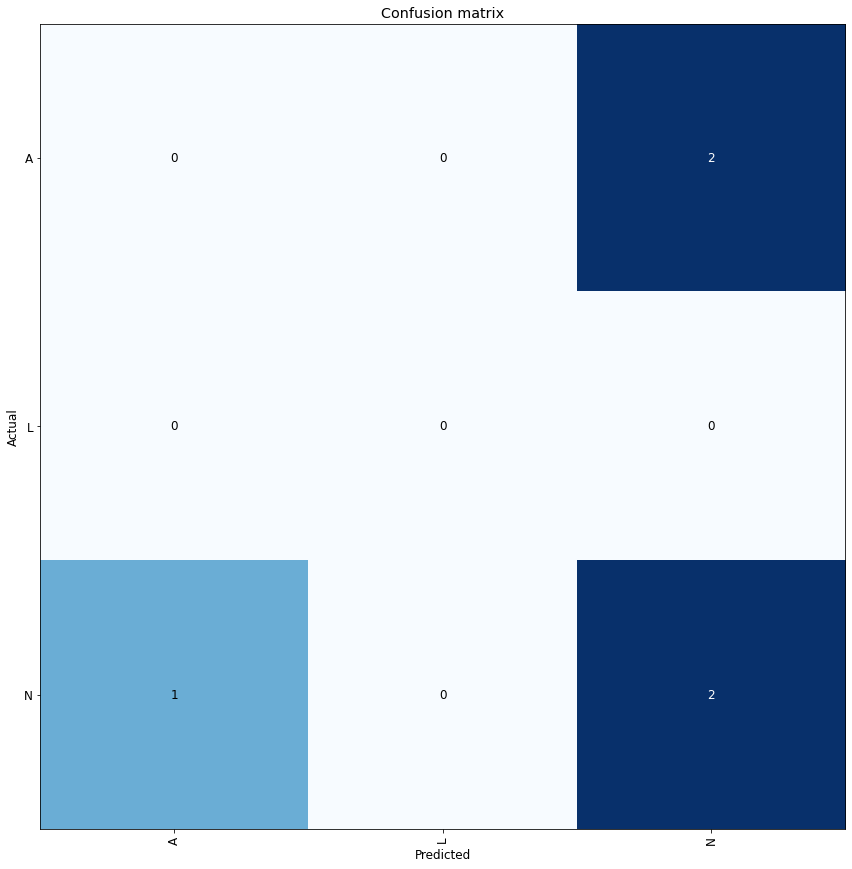

In [40]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=72)

In [41]:
interp.most_confused(min_val=3)

[]

In [42]:
learn.load("01i-stage1")

In [43]:
learn.unfreeze()

In [44]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.067526,0.945801,0.400000,00:05
1,0.048095,3.833197,0.400000,00:05


In [45]:
learn.load("01i-stage1")

In [46]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

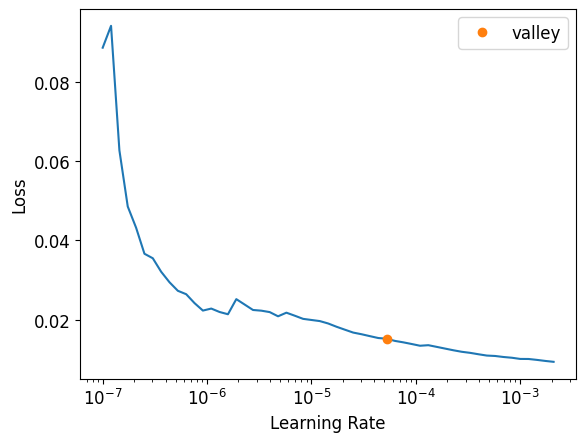

In [47]:
learn.lr_find()

In [48]:
learn.fit_one_cycle(3, lr_max=slice(3e-7, 3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.020650,1.003455,0.600000,00:05
1,0.025496,0.983497,0.600000,00:06
2,0.020360,1.016345,0.600000,00:05


In [49]:
learn.save('01i-stage2')

Path('models/01i-stage2.pth')

In [50]:
learn = cnn_learner(dls, resnet50, pretrained=True, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


In [51]:
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,1.664450,1.251554,0.600000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,2.837022,1.317451,0.400000,00:05
1,2.074853,1.207690,0.400000,00:07
2,1.939193,1.209315,0.600000,00:05
3,1.926643,1.364785,0.800000,00:06
4,1.896631,1.290893,0.800000,00:05
5,1.751779,1.040066,0.400000,00:05
6,1.750287,0.984873,0.600000,00:07
7,1.588138,0.905610,0.400000,00:05
8,1.540844,1.047388,0.600000,00:06
9,1.409737,1.345650,0.600000,00:05
